/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_70978/3060556058.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval = interval, period = PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_HIST,...,Pos_Flow,Neg_Flow,MFR,MFI,MFI_Strategy,MACD_Strategy,Confl_Strategy,Strategy,asset_cum_returns,strategy_cum_returns
13,380.519989,381.579987,380.399994,381.029999,7468194,380.709298,380.700313,0.008985,-0.054057,0.063042,...,0.000000,380.833323,0.857638,46.168193,NaN,NaN,NaN,0,NaN,NaN
14,385.149994,385.220001,382.690002,383.250000,14254487,381.453190,381.174004,0.279187,0.015022,0.264164,...,384.353333,0.000000,1.001954,50.048795,0.0,1.0,1.0,0,0.012168,0.000000
15,386.470001,387.299988,385.000000,385.149994,11207537,382.282258,381.718710,0.563548,0.127905,0.435643,...,386.256663,0.000000,1.339108,57.248667,0.0,1.0,1.0,0,0.015637,0.000000
16,385.644989,386.829712,385.410004,386.459991,5761279,382.831706,382.110234,0.721471,0.249353,0.472118,...,0.000000,385.961568,1.336240,57.196180,0.0,1.0,1.0,0,0.013468,0.000000
17,385.744995,386.820007,385.630005,385.638885,5196753,383.303216,382.462717,0.840499,0.369751,0.470748,...,386.065002,0.000000,1.338373,57.235224,0.0,1.0,1.0,0,0.013731,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,675.049988,675.640015,672.760010,674.400024,8106653,675.159111,676.726565,-1.567453,-0.694374,-0.873079,...,674.483337,0.000000,0.556536,35.754774,1.0,-1.0,0.0,0,0.774020,0.031432
5082,673.130005,675.659973,672.140015,675.054993,9745100,674.846941,676.469667,-1.622726,-0.880045,-0.742682,...,0.000000,673.643331,0.399941,28.568441,0.0,-1.0,-1.0,0,0.768974,0.031432
5083,674.019897,674.440002,671.489990,673.109985,9663134,674.719704,676.294684,-1.574980,-1.019032,-0.555948,...,0.000000,673.316630,0.400522,28.598077,1.0,-1.0,0.0,0,0.771313,0.031432
5084,672.645020,675.119995,672.210022,674.020020,9331407,674.400522,676.033994,-1.633472,-1.141920,-0.491552,...,673.325012,0.000000,0.556650,35.759473,1.0,-1.0,0.0,0,0.767700,0.031432


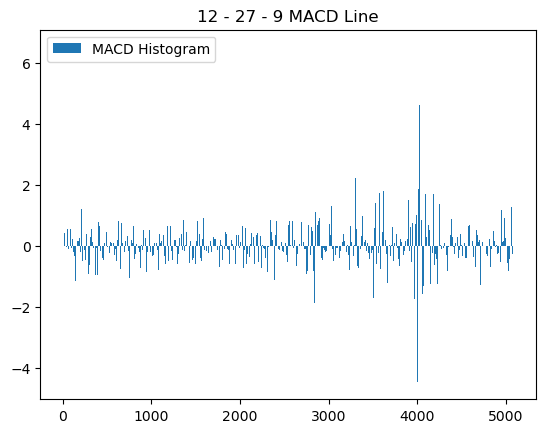

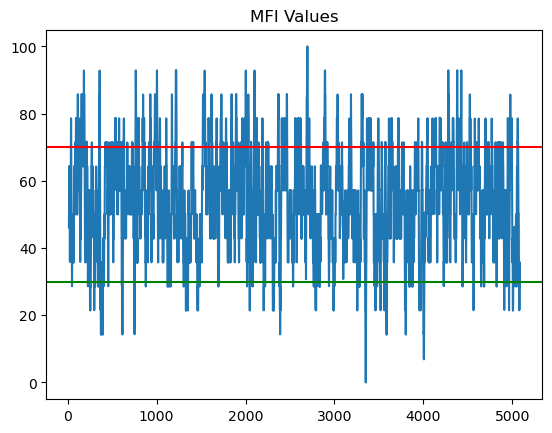

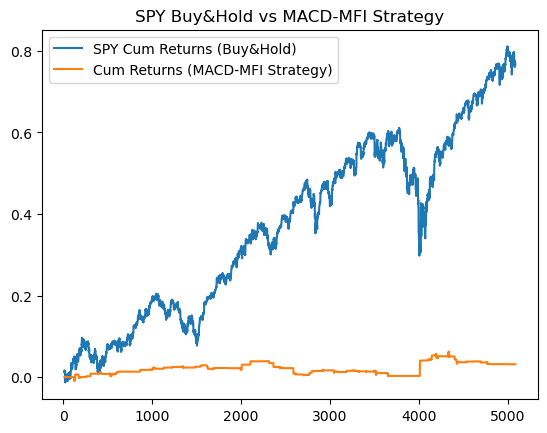

In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 

# Step 1: Ticker
TICKER = "SPY"

# Step 2: Price Behavior 
INTERVAL = "1h"
if INTERVAL == "1h":
    PERIOD = "730d"
else:
    PERIOD = "max"

# Step 3: MACD
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9

# Step 4: MFI 
MFI_LENGTH = 14
OVERBROUGHT = 70
OVERSOLD = 30

# Step 5: Data Subsection
LOOKBACK = 10000


def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):
    
    # Step 1: Download Data
    df = yf.download(ticker, interval = interval, period = PERIOD)
    
    # Step 2: Select only Level 0 from Multilevel Column (MultiIndex)
    df.columns = df.columns.get_level_values(0)

    # Step 3: Simplifying df-Index for Plots
    df = df.reset_index(drop=True)

    # Step 4: Return Subsect Data 
    return df.iloc[-lookback:, :]
        # -lookback: Get me the last lookback rows
        # : Get me all Columns

def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    
    # Step 1: Fast and Slow EMA Columns
    df[f"{fast}_ema"] = df["Close"].ewm(span = fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span = slow).mean()

    # Step 2: MACD Column (= Difference betwenn fast and slow ema)
    df["MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

    # Step 3: MACD Signal (= Span Period)
    df["Signal"] = df[f"MACD"].ewm(span = span).mean()

    # Step 4: MACD Hist
    df["MACD_HIST"] = df[f"MACD"] - df["Signal"]

    # Step 5: Plot Histogram
    plt.figure()
    plt.bar(x=range(len(df)), height=df["MACD_HIST"])
        # Every Bar = Every Date in the Index
        # Direction: Bar (>0) --> Bullish vs. Bar (<0) --> Bearish
        # Strength: Bar (Tall) --> Strong Momentum vs. Bar (Short) --> Weak Momentum
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])

    return df

def add_MFI(df, length = MFI_LENGTH):
    
    # Step 1: Build the MFI Index
    df["Average_Price"] = (df["High"]+df["Low"]+df["Close"])/3
    df["Money_Flow"] = df["Volume"]*df["Average_Price"]
    df["Pos_Flow"] = np.where(df["Average_Price"].diff()>0, df["Average_Price"], 0)
    df["Neg_Flow"] = np.where(df["Average_Price"].diff()<0, df["Average_Price"], 0)
    df["MFR"] = df["Pos_Flow"].rolling(window=length).sum() / df["Neg_Flow"].rolling(window=length).sum()
    df["MFI"] = (100 - 100 / (1 + df["MFR"]))

    # Step 2: Plot the MFI Index
    plt.figure()
    plt.plot(df["MFI"])
    plt.title("MFI Values")

    # Step 3: Draw Overbrought & Oversold Lines
    plt.axhline(OVERBROUGHT, color="red")
    plt.axhline(OVERSOLD, color="green")

    # Step 4: Return values without NA
    return df.dropna()

def add_MACD_strategy(df): 

    # Step 1: Long when Bullish Momentum, Short for Bearish Momentum
    df["MACD_Strategy"] = np.where(df["MACD_HIST"] > 0, 1, -1)

    # Step 2: Shift the signal to prevent lookahead bias - we can only understand Data after it happens:
    df["MACD_Strategy"] = df["MACD_Strategy"].shift(1)
    
    return df

def add_MFI_strategy(df, overbrought= OVERBROUGHT, oversold=OVERSOLD):
    df["MFI_Strategy"] = np.where(df["MFI"] > overbrought, -1, 
                    np.where(df["MFI"] < oversold, 1, 0))
    df["MFI_Strategy"] = df["MFI_Strategy"].shift(1)
    
    return df 

def add_confluence_strategy(df):
    
    # Step 1: Place trades, when those agree with each other/there is a confluence
    df["Confl_Strategy"] = df["MACD_Strategy"] + df["MFI_Strategy"]

    # Adjust for Simplicity
    df["Strategy"] = np.where(df["Confl_Strategy"] == 2, 1,
                    np.where(df["Confl_Strategy"] == -2, -1, 0))

    return df 

def test_strategy(df):
    
    # Step 1: Buy&Hold Compound Returns - What is my total profit if I bought on day one and just held it?
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1
        # pct.change(): get the tiny percentage return per day
        # cumprod(): multiply all of those returns together (compounding)
        # 1+ ... -1: turn daily returns like 2% in 1.02 and then back to eg 30% again

    # Step 2: Total Profits only if I followed my strategy's signals
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() -1
        # *df["Strategy": 
        #   (1) you get the normal daily return, 
        #   (-1) you get the opposite of the daily return. Only if the market goes down, you win
        #   (0) you wait and get 0 return
        # pct_change() * df["Strategy"]: 

    # Step 3: Plot Returns
    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", "Cum Returns (MACD-MFI Strategy)"])
    plt.title(f"{TICKER} Buy&Hold vs MACD-MFI Strategy")
    # In this graph we can recognize the compunding effect 

    return df 

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_MFI(df)
    df = add_MFI_strategy(df)
    df = add_MACD_strategy(df)
    df = add_confluence_strategy(df)
    df = test_strategy(df)

    return df

df = main()
df

In [2]:
# Testing Values
df["MACD_Strategy"].value_counts()

MACD_Strategy
-1.0    2656
 1.0    2416
Name: count, dtype: int64

In [3]:
# Testing Values
df["MFI_Strategy"].value_counts()

MFI_Strategy
 0.0    3717
-1.0    1013
 1.0     342
Name: count, dtype: int64

In [4]:
# Testing Values
df["Confl_Strategy"].value_counts()

Confl_Strategy
-1.0    2140
 1.0    1577
 0.0    1125
-2.0     202
 2.0      28
Name: count, dtype: int64

In [5]:
df["Strategy"].value_counts()

Strategy
 0    4843
-1     202
 1      28
Name: count, dtype: int64